In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('Zomato-data-.csv')
print(df.to_string())

                                                name online_order book_table    rate  votes  approx_cost(for two people) listed_in(type)
0                                              Jalsa          Yes        Yes   4.1/5    775                          800          Buffet
1                                     Spice Elephant          Yes         No   4.1/5    787                          800          Buffet
2                                    San Churro Cafe          Yes         No   3.8/5    918                          800          Buffet
3                              Addhuri Udupi Bhojana           No         No   3.7/5     88                          300          Buffet
4                                      Grand Village           No         No   3.8/5    166                          600          Buffet
5                                    Timepass Dinner          Yes         No   3.8/5    286                          600          Buffet
6    Rosewood International Hotel - Bar &

In [14]:
def cleandata(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)
df['rate']=df['rate'].apply(cleandata)
print(df.to_string())

                                                name online_order book_table  rate  votes  approx_cost(for two people) listed_in(type)
0                                              Jalsa          Yes        Yes   4.1    775                          800          Buffet
1                                     Spice Elephant          Yes         No   4.1    787                          800          Buffet
2                                    San Churro Cafe          Yes         No   3.8    918                          800          Buffet
3                              Addhuri Udupi Bhojana           No         No   3.7     88                          300          Buffet
4                                      Grand Village           No         No   3.8    166                          600          Buffet
5                                    Timepass Dinner          Yes         No   3.8    286                          600          Buffet
6    Rosewood International Hotel - Bar & Restaurant   

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [5]:
print(df.isnull().sum())

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64


In [16]:
df=df.fillna("")

<Axes: xlabel='listed_in(type)', ylabel='count'>

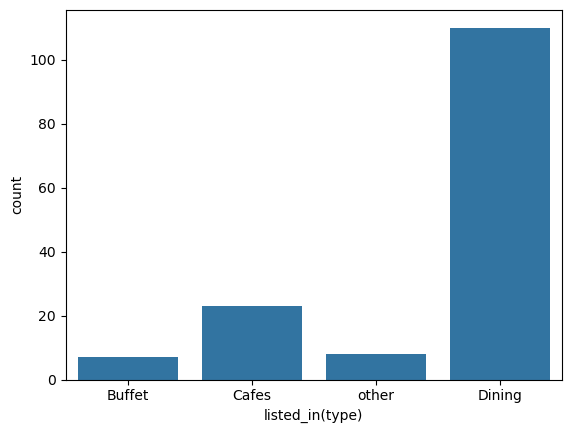

In [6]:
sns.countplot(x=df['listed_in(type)'])

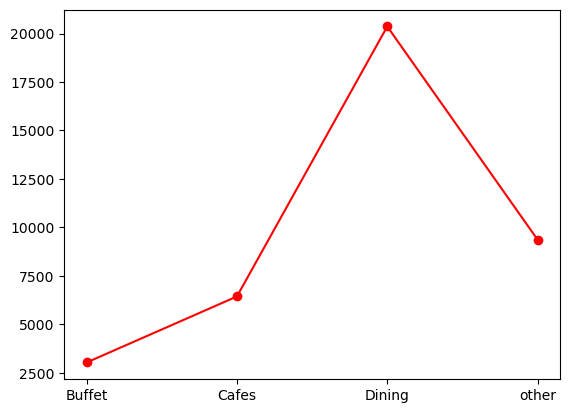

In [7]:
group=df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':group})
plt.plot(result,c='RED',marker='o')

In [8]:
max_vote=df['votes'].max()
vot_result=df.loc[df['votes'] == max_vote,'name']
print(vot_result)

38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

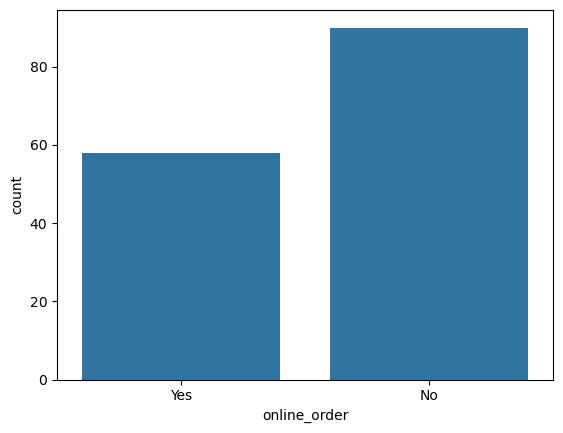

In [9]:
sns.countplot(x=df['online_order'])

(array([10., 30., 44., 51., 13.]),
 array([2.6, 3. , 3.4, 3.8, 4.2, 4.6]),
 <BarContainer object of 5 artists>)

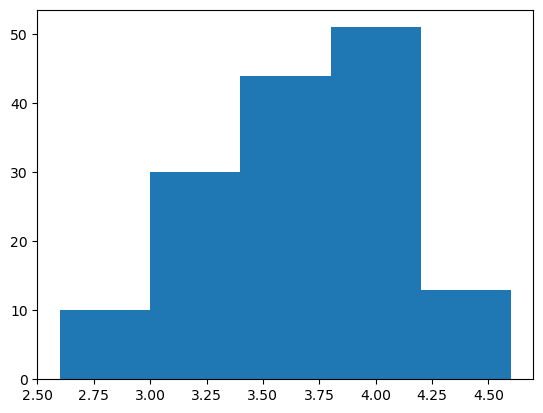

In [10]:
plt.hist(df['rate'],bins=5)

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

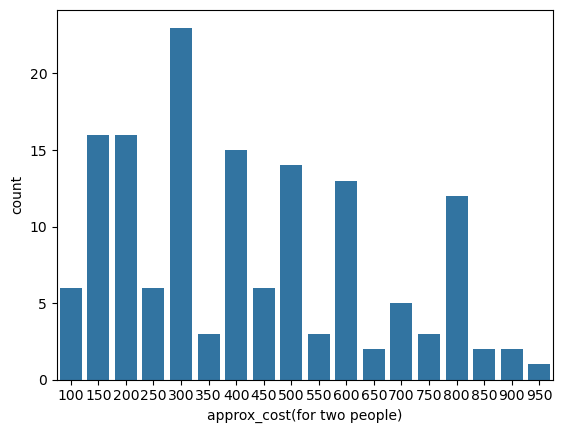

In [11]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

<Axes: xlabel='online_order', ylabel='rate'>

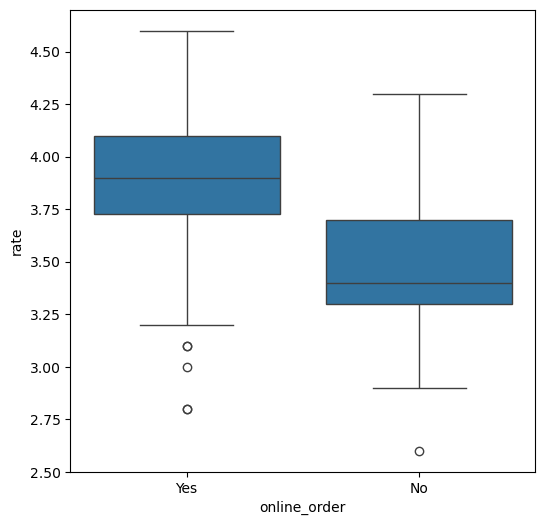

In [12]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=df)

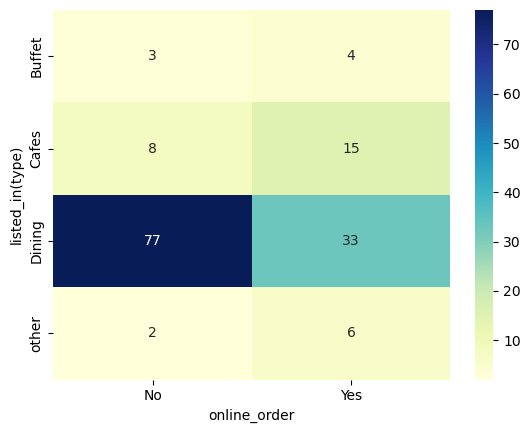

In [13]:
pivot_table=df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap='YlGnBu',fmt='d')
plt.show()